# Implementation

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

def soft2hard(arr, threshold):
    return np.where(np.array(arr)<threshold, 0, 1)

def to_confusion(hard_pred, truth):
    mat = np.zeros((2,2))
    for i in range(len(hard_pred)):
        mat[hard_pred[i], truth[i]]+=1
    return mat

def positives(conf_mat):
    #print('TP, FP, Precision')
    TP, FP = conf_mat[1,1], conf_mat[1,0]
    return TP, FP, np.round(TP/(FP+TP), 2)

def plot_roc(thresholds, soft_preds, truth):
    length = len(soft_preds)
    FPs = [length]
    TPs = [length]
    for t in sorted(thresholds):
        TP, FP, Pres = positives(to_confusion(soft2hard(soft_preds, t), truth))
        FPs.append(FP)
        TPs.append(TP)
    FPs.append(0)
    TPs.append(0)
    plt.plot(FPs, TPs, color = 'blue')
    plt.plot([0, length], [0, length], '--', color = 'grey')
    plt.grid()
    plt.xlabel('False Positives', size = 14)
    plt.ylabel('True Positives', size = 14)
    plt.title('ROC Curve', size = 16)
    plt.show()
    print('Area:', abs(trapz(y=TPs, x=FPs)))
    return 

def plot_pr(thresholds, soft_preds, truth):
    length = len(soft_preds)
    precs = []
    recall = []
    thresholds = sorted(thresholds)
    for t in thresholds:
        mat = to_confusion(soft2hard(soft_preds, t), truth)
        precs.append(mat[1, 1] / (mat[1, 0] + mat[1, 1]))
        recall.append( mat[1, 1]/ (mat[0, 1] + mat[1, 1]))
    F1 = [precs[i]*recall[i]/(precs[i]+recall[i]) for i in range(len(precs))]
    plt.plot(recall, precs, color = 'blue')
    plt.xlabel('Recall', size = 14)
    plt.xlim([0,1])
    plt.ylabel('Precision', size = 14)
    plt.ylim([0,1])
    plt.title('PR Plot', size = 16)
    print('Area:', abs(trapz(precs, recall)))
    plt.show()
    index = np.where(F1==max(F1))[0][0]
    return index, thresholds[index], F1[index]

In [204]:
sp = [0.12, 0.25, 0.33, 0.41, 0.45, 0.55, 0.59, 0.62, 0.83, 0.88]
true = [0, 0, 1, 0, 1, 1, 1, 0, 1, 1]
thresholds = [0.2, 0.4, 0.5, 0.6, 0.8]

In [205]:
hard_preds = soft2hard(sp, thresholds[0])
hard_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [206]:
mat = to_confusion(hard_preds, true)
mat

array([[1., 0.],
       [3., 6.]])

In [207]:
TP, FP, Precision = positives(mat)
TP, FP, Precision

(6.0, 3.0, 0.67)

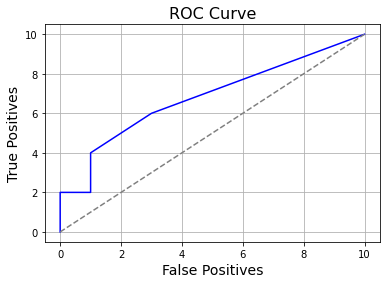

Area: 68.0


In [208]:
plot_roc(thresholds, sp, true)

Area: 0.48571428571428577


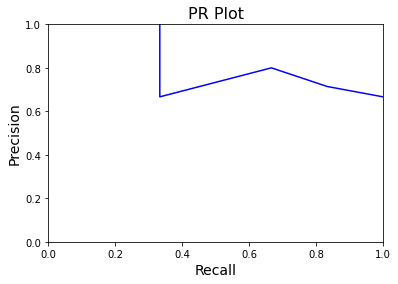

(0, 0.2, 0.4)

In [211]:
plot_pr(thresholds, sp, true)

The threshold choice of 0.2 optimizes the $F_1$ score.